# Read data from numerical Simulation

The raw data are from the numerical Simulation by Saury et al 2014 (https://ui.adsabs.harvard.edu/abs/2014A&A...567A..16S/abstract)

# Install packages

In [2]:
# ! pip install astroML

In [3]:
# !pip install torch-lr-finder

In [4]:
# ! pip install spectral-cube

# Connect and authorize google drive

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

Mounted at /content/gdrive
gdrive	sample_data


In [6]:
%cd /content/gdrive/My Drive/Colab Notebooks/ML_HI/
!ls

/content/gdrive/My Drive/Colab Notebooks/ML_HI
autoencoder_compress.png       lightning_logs
autoencoder.h5		       MCMC
autoencoder_no_compress.png    MCMC_
best_rs_1.pickle	       MLPClassifier_MLPRegressor.ipynb
best_rs_2.pickle	       MLPRegressor.ipynb
best_rs_3.pickle	       model.png
best_rs_chan400_1.pickle       random_weights.h5
catalogged_verification.fits   rhi_zea.fits
CNN			       spec64k.npz
conv_autoencoder.h5	       tigress
conv_encoder.h5		       training_data_kok14_galfa.pickle
data			       transforms
encoder_compress.png	       Untitled.ipynb
encoder.h5		       vae
fcnm_zea.fits		       VAE_decoder.h5
figures			       VAE_encoder.h5
Find_GNOMES_sightlines.ipynb   VAE.h5
GNOMES_vs_GALFA_spectra.ipynb  vae_mlp_decoder.png
libs


In [7]:
! pwd

/content/gdrive/My Drive/Colab Notebooks/ML_HI


# Paths

In [8]:
import sys, os
base_path = os.getcwd()

data_path  = os.path.join(base_path, 'data')
vae_path = os.path.join(base_path, 'vae')
saury_data_path = os.path.join(data_path, 'saury', '')

print(base_path)
print(data_path)

/content/gdrive/My Drive/Colab Notebooks/ML_HI
/content/gdrive/My Drive/Colab Notebooks/ML_HI/data


In [9]:
# Training and test datasets
# 1. Datacubes: 04 datacubes with size of (512 x 512 x 101)
training_data_file_q0 = 'Tb_n01_pw02_vs12_512_thick_quarter_0_noise_1.0_K_beam_1.45_pix_.fits'
training_data_file_q1 = 'Tb_n01_pw02_vs12_512_thick_quarter_1_noise_1.0_K_beam_1.45_pix_.fits'
training_data_file_q2 = 'Tb_n01_pw02_vs12_512_thick_quarter_2_noise_1.0_K_beam_1.45_pix_.fits'
training_data_file_q3 = 'Tb_n01_pw02_vs12_512_thick_quarter_3_noise_1.0_K_beam_1.45_pix_.fits'

training_data_file_q0 = os.path.join(saury_data_path, training_data_file_q0)
training_data_file_q1 = os.path.join(saury_data_path, training_data_file_q1)
training_data_file_q2 = os.path.join(saury_data_path, training_data_file_q2)
training_data_file_q3 = os.path.join(saury_data_path, training_data_file_q3)

# 2a. R_HI maps without noise
rhi_file_q0 = 'R_map_n01_pw02_vs12_512px_quarter_0.fits'
rhi_file_q1 = 'R_map_n01_pw02_vs12_512px_quarter_1.fits'
rhi_file_q2 = 'R_map_n01_pw02_vs12_512px_quarter_2.fits'
rhi_file_q3 = 'R_map_n01_pw02_vs12_512px_quarter_3.fits'

rhi_file_q0 = os.path.join(saury_data_path, rhi_file_q0)
rhi_file_q1 = os.path.join(saury_data_path, rhi_file_q1)
rhi_file_q2 = os.path.join(saury_data_path, rhi_file_q2)
rhi_file_q3 = os.path.join(saury_data_path, rhi_file_q3)

# 2b. R_HI maps with noise
noise_rhi_file_q0 = 'R_map_n01_pw02_vs12_512px_quarter_0_noise.fits'
noise_rhi_file_q1 = 'R_map_n01_pw02_vs12_512px_quarter_1_noise.fits'
noise_rhi_file_q2 = 'R_map_n01_pw02_vs12_512px_quarter_2_noise.fits'
noise_rhi_file_q3 = 'R_map_n01_pw02_vs12_512px_quarter_3_noise.fits'

noise_rhi_file_q0 = os.path.join(saury_data_path, noise_rhi_file_q0)
noise_rhi_file_q1 = os.path.join(saury_data_path, noise_rhi_file_q1)
noise_rhi_file_q2 = os.path.join(saury_data_path, noise_rhi_file_q2)
noise_rhi_file_q3 = os.path.join(saury_data_path, noise_rhi_file_q3)

# 3a. FCNM maps without noise
fcnm_file_q0 = 'fcnm_map_n01_pw02_vs12_Tcut_500K_512px_quarter_0.fits'
fcnm_file_q1 = 'fcnm_map_n01_pw02_vs12_Tcut_500K_512px_quarter_1.fits'
fcnm_file_q2 = 'fcnm_map_n01_pw02_vs12_Tcut_500K_512px_quarter_2.fits'
fcnm_file_q3 = 'fcnm_map_n01_pw02_vs12_Tcut_500K_512px_quarter_3.fits'

fcnm_file_q0 = os.path.join(saury_data_path, fcnm_file_q0)
fcnm_file_q1 = os.path.join(saury_data_path, fcnm_file_q1)
fcnm_file_q2 = os.path.join(saury_data_path, fcnm_file_q2)
fcnm_file_q3 = os.path.join(saury_data_path, fcnm_file_q3)

# 3a. FCNM maps with noise
noise_fcnm_file_q0 = 'fcnm_map_n01_pw02_vs12_Tcut_500K_512px_quarter_0_noise.fits'
noise_fcnm_file_q1 = 'fcnm_map_n01_pw02_vs12_Tcut_500K_512px_quarter_1_noise.fits'
noise_fcnm_file_q2 = 'fcnm_map_n01_pw02_vs12_Tcut_500K_512px_quarter_2_noise.fits'
noise_fcnm_file_q3 = 'fcnm_map_n01_pw02_vs12_Tcut_500K_512px_quarter_3_noise.fits'

noise_fcnm_file_q0 = os.path.join(saury_data_path, noise_fcnm_file_q0)
noise_fcnm_file_q1 = os.path.join(saury_data_path, noise_fcnm_file_q1)
noise_fcnm_file_q2 = os.path.join(saury_data_path, noise_fcnm_file_q2)
noise_fcnm_file_q3 = os.path.join(saury_data_path, noise_fcnm_file_q3)

print(training_data_file_q0)
print(fcnm_file_q0)
print(noise_rhi_file_q0)

/content/gdrive/My Drive/Colab Notebooks/ML_HI/data/saury/Tb_n01_pw02_vs12_512_thick_quarter_0_noise_1.0_K_beam_1.45_pix_.fits
/content/gdrive/My Drive/Colab Notebooks/ML_HI/data/saury/fcnm_map_n01_pw02_vs12_Tcut_500K_512px_quarter_0.fits
/content/gdrive/My Drive/Colab Notebooks/ML_HI/data/saury/R_map_n01_pw02_vs12_512px_quarter_0_noise.fits


# Libraries

In [10]:
sys.path.insert(1, data_path)

from __future__ import print_function, division
from astropy.io          import fits
from astropy             import units as u
from astropy.coordinates import SkyCoord

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import ndimage

import glob
import pickle

In [11]:
from astropy.wcs import WCS
# from spectral_cube import SpectralCube

# Read training dataset

**Note:** Atomic Hydrogen Gas = HI

Training set is a datacube with a size of (101, 512, 512) includes (512x512) spectra (spectral data: signal strength $T_b$ as a function of 101 wavelength channels) and their ground-truth cold atomic hydrogen gas fraction (FCNM) and opacity correction factor (R). The training dataset was obtained from a simulation.

FCNM range: from ~0. to (less than) 1.
R range: >= 1

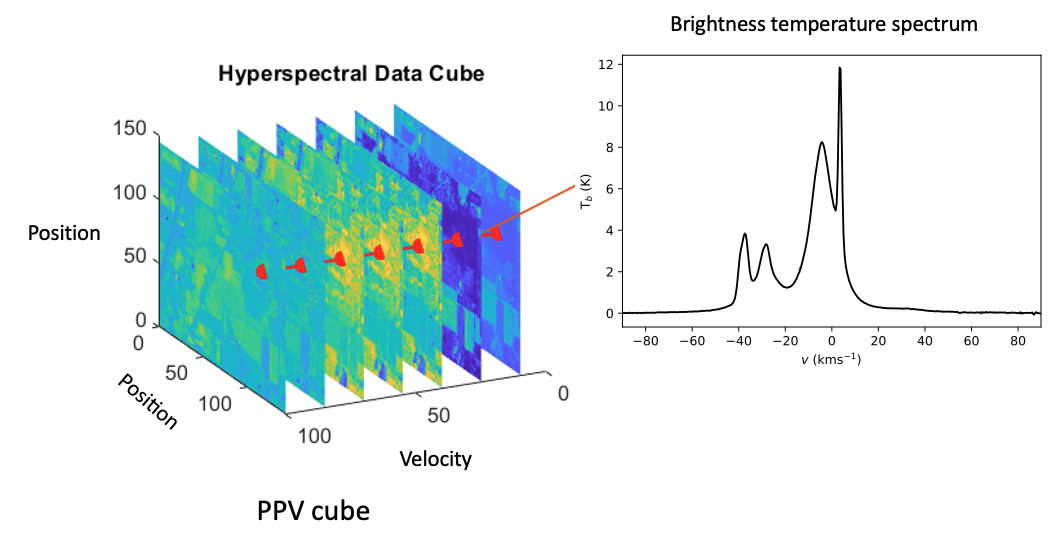

An image of sky with a size of (512 x 512) pixels. Each sky pixel corresponds to a unique spectrum (length = 101 velocity channels).

In [12]:
hdu = fits.open(training_data_file_q0)
data = hdu[0].data

print(data.shape)

(101, 512, 512)


Position X : 512 bins

Position Y : 512 bins

Velocity Z : 101 channels (in radio astronomy, wavelength [m]/frequency [Hz] is often converted into velocity [VLSR: km/s or m/s].)

# Total intensity maps (or optically-thin HI column density maps)

Position-Position-Velocity (PPV) emission cubes with realistic noise (1K) and beam (30'') for simulated HI clouds located at 400pc.

Below are 4 PPV emission cubes

### Datacube 1

In [14]:
data, header = fits.getdata(training_data_file_q0, header=True)

In [15]:
for x in header:
    print(x, header[x])

SIMPLE True
BITPIX -64
NAXIS 3
NAXIS1 512
NAXIS2 512
NAXIS3 101
CTYPE3 v [km.s-1]
CRVAL3 -8.000000000000114
CDELT3 0.8
CRPIX3 40
BUNIT K
COMMENT Tb


In [17]:
hdr = fits.getheader(training_data_file_q0)

In [18]:
# Sum along 101 velocity channels
WHI = np.sum(data, axis=0)
NHI_thin = 1.8224 * 1.e-2 * WHI # In unit of 10^20 cm-2

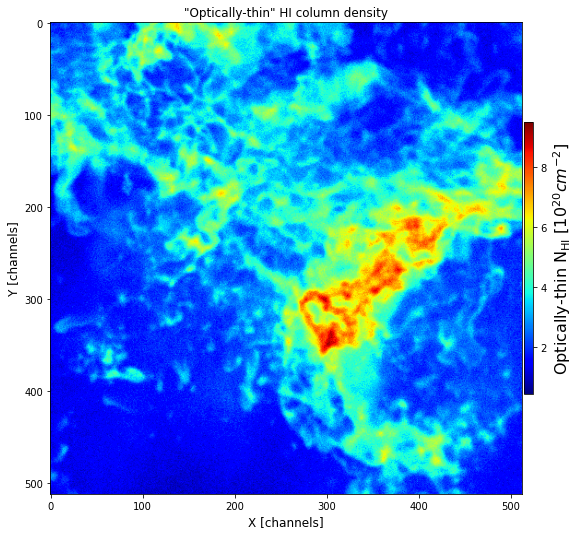

In [29]:
plt.figure(figsize=(10,10))
plt.imshow(NHI_thin, cmap='jet')

cbar = plt.colorbar(shrink=0.5, pad=0.005, aspect=30)
cbar.set_label('Optically-thin N$_\mathrm{HI}$ [10$^{20} cm^{-2}$]', size=16)

plt.title('\"Optically-thin\" HI column density')
plt.ylabel('Y [channels]', fontsize=12)
plt.xlabel('X [channels]', fontsize=12)
plt.show()

### Datacube 2

In [30]:
data, header = fits.getdata(training_data_file_q1, header=True)

In [31]:
hdr = fits.getheader(training_data_file_q1)
for x in hdr:
    print(x, hdr[x])

SIMPLE True
BITPIX -64
NAXIS 3
NAXIS1 512
NAXIS2 512
NAXIS3 101
CTYPE3 v [km.s-1]
CRVAL3 -8.000000000000114
CDELT3 0.8
CRPIX3 40
BUNIT K
COMMENT Tb


In [32]:
# Sum along 101 velocity channels
WHI = np.sum(data, axis=0)
NHI_thin = 1.8224 * 1.e-2 * WHI # In unit of 10^20 cm-2

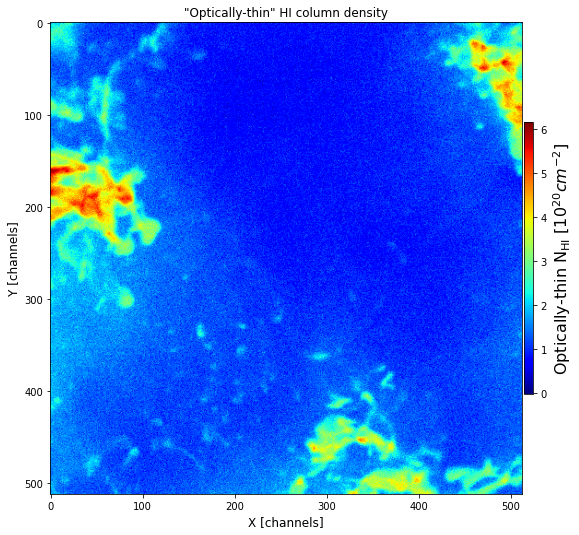

In [33]:
plt.figure(figsize=(10,10))
plt.imshow(NHI_thin, cmap='plasma')

cbar = plt.colorbar(shrink=0.5, pad=0.005, aspect=30)
cbar.set_label('Optically-thin N$_\mathrm{HI}$ [10$^{20} cm^{-2}$]', size=16)

plt.title('\"Optically-thin\" HI column density')
plt.ylabel('Y [channels]', fontsize=12)
plt.xlabel('X [channels]', fontsize=12)
plt.show()

### Datacube 3

In [34]:
data, header = fits.getdata(training_data_file_q2, header=True)

In [35]:
# Sum along 101 velocity channels
WHI = np.sum(data, axis=0)
NHI_thin = 1.8224 * 1.e-2 * WHI # In unit of 10^20 cm-2

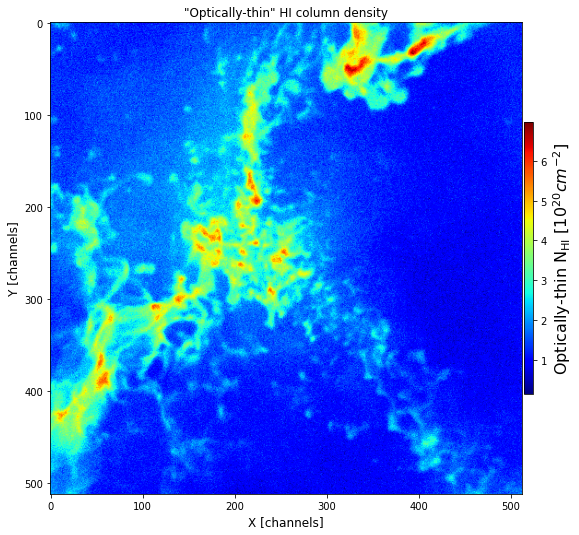

In [36]:
plt.figure(figsize=(10,10))
plt.imshow(NHI_thin, cmap='plasma')

cbar = plt.colorbar(shrink=0.5, pad=0.005, aspect=30)
cbar.set_label('Optically-thin N$_\mathrm{HI}$ [10$^{20} cm^{-2}$]', size=16)

plt.title('\"Optically-thin\" HI column density')
plt.ylabel('Y [channels]', fontsize=12)
plt.xlabel('X [channels]', fontsize=12)
plt.show()

### Datacube 4

In [37]:
data, header = fits.getdata(training_data_file_q3, header=True)

In [38]:
# Sum along 101 velocity channels
WHI = np.sum(data, axis=0)
NHI_thin = 1.8224 * 1.e-2 * WHI # In unit of 10^20 cm-2

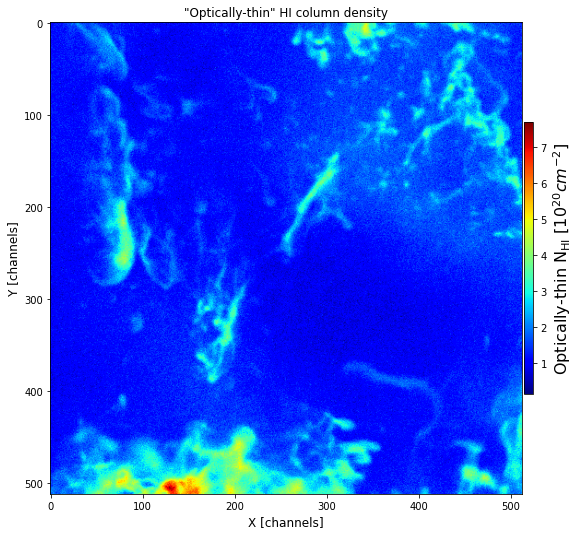

In [39]:
plt.figure(figsize=(10,10))
plt.imshow(NHI_thin, cmap='plasma')

cbar = plt.colorbar(shrink=0.5, pad=0.005, aspect=30)
cbar.set_label('Optically-thin N$_\mathrm{HI}$ [10$^{20} cm^{-2}$]', size=16)

plt.title('\"Optically-thin\" HI column density')
plt.ylabel('Y [channels]', fontsize=12)
plt.xlabel('X [channels]', fontsize=12)
plt.show()

# Ground-truth cold HI gas fraction

Each spectrum at (Xi, Yi) has a corresponding ground-truth $F_{CNM}$ at the same sky pixel (Xi, Yi).

### $F_{CNM}$ maps without noise (no convolution with telescope beam)

#### $F_{CNM}$ map 1

In [41]:
print('File:', fcnm_file_q0)
fcnm_data, header = fits.getdata(fcnm_file_q0, header=True)
print(fcnm_data.shape)

File: /content/gdrive/My Drive/Colab Notebooks/ML_HI/data/saury/fcnm_map_n01_pw02_vs12_Tcut_500K_512px_quarter_0.fits
(512, 512)


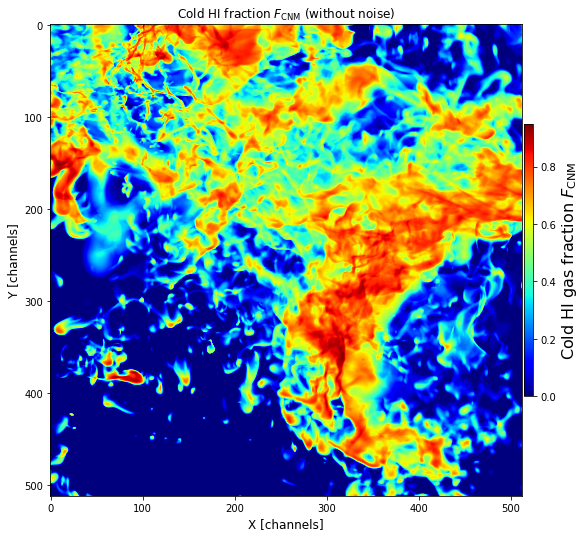

In [45]:
plt.figure(figsize=(10,10))
plt.imshow(fcnm_data, cmap='plasma')

cbar = plt.colorbar(shrink=0.5, pad=0.005, aspect=30)
cbar.set_label('Cold HI gas fraction $F_\mathrm{CNM}$', size=16)

plt.title('Cold HI fraction $F_\mathrm{CNM}$ (without noise)')
plt.ylabel('Y [channels]', fontsize=12)
plt.xlabel('X [channels]', fontsize=12)
plt.show()

#### $F_{CNM}$ map 2

In [46]:
print('File:', fcnm_file_q1)
fcnm_data, header = fits.getdata(fcnm_file_q1, header=True)
print(fcnm_data.shape)

File: /content/gdrive/My Drive/Colab Notebooks/ML_HI/data/saury/fcnm_map_n01_pw02_vs12_Tcut_500K_512px_quarter_1.fits
(512, 512)


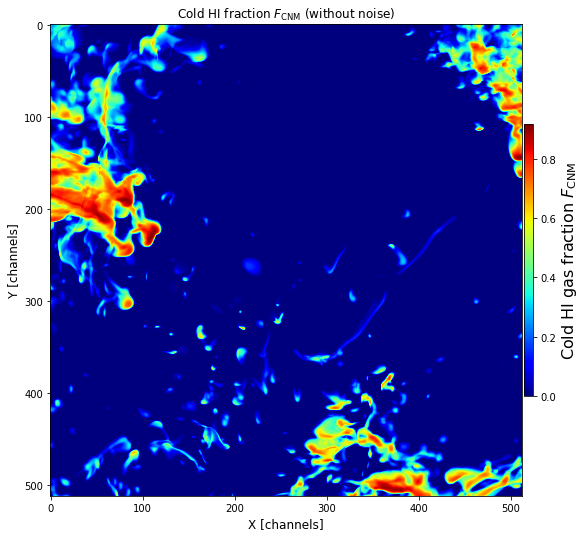

In [47]:
plt.figure(figsize=(10,10))
plt.imshow(fcnm_data, cmap='plasma')

cbar = plt.colorbar(shrink=0.5, pad=0.005, aspect=30)
cbar.set_label('Cold HI gas fraction $F_\mathrm{CNM}$', size=16)

plt.title('Cold HI fraction $F_\mathrm{CNM}$ (without noise)')
plt.ylabel('Y [channels]', fontsize=12)
plt.xlabel('X [channels]', fontsize=12)
plt.show()

#### $F_{CNM}$ map 3

In [48]:
print('File:', fcnm_file_q2)
fcnm_data, header = fits.getdata(fcnm_file_q2, header=True)
print(fcnm_data.shape)

File: /content/gdrive/My Drive/Colab Notebooks/ML_HI/data/saury/fcnm_map_n01_pw02_vs12_Tcut_500K_512px_quarter_2.fits
(512, 512)


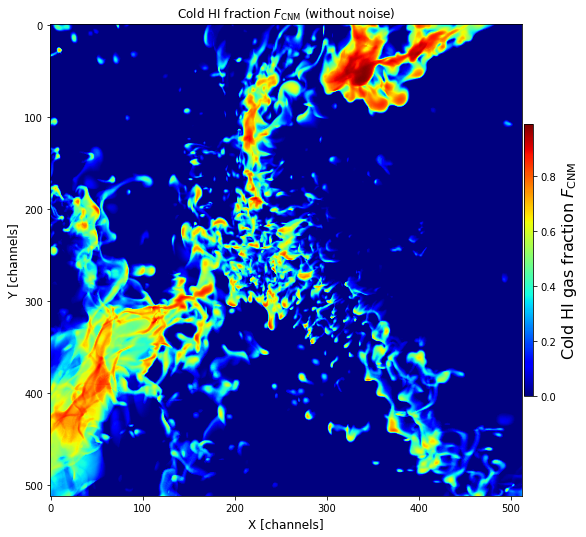

In [49]:
plt.figure(figsize=(10,10))
plt.imshow(fcnm_data, cmap='plasma')

cbar = plt.colorbar(shrink=0.5, pad=0.005, aspect=30)
cbar.set_label('Cold HI gas fraction $F_\mathrm{CNM}$', size=16)

plt.title('Cold HI fraction $F_\mathrm{CNM}$ (without noise)')
plt.ylabel('Y [channels]', fontsize=12)
plt.xlabel('X [channels]', fontsize=12)
plt.show()

#### $F_{CNM}$ map 4

In [50]:
print('File:', fcnm_file_q3)
fcnm_data, header = fits.getdata(fcnm_file_q3, header=True)
print(fcnm_data.shape)

File: /content/gdrive/My Drive/Colab Notebooks/ML_HI/data/saury/fcnm_map_n01_pw02_vs12_Tcut_500K_512px_quarter_3.fits
(512, 512)


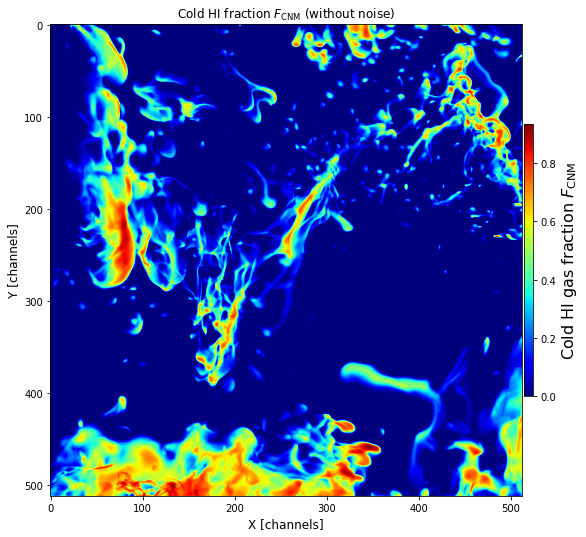

In [51]:
plt.figure(figsize=(10,10))
plt.imshow(fcnm_data, cmap='plasma')

cbar = plt.colorbar(shrink=0.5, pad=0.005, aspect=30)
cbar.set_label('Cold HI gas fraction $F_\mathrm{CNM}$', size=16)

plt.title('Cold HI fraction $F_\mathrm{CNM}$ (without noise)')
plt.ylabel('Y [channels]', fontsize=12)
plt.xlabel('X [channels]', fontsize=12)
plt.show()

### $F_{CNM}$ maps with noise (convolved with telescope beam)

In order to get the sense of uncertainties: Convolve the $F_{CNM}$ map with GASKAP beam (30 arcseconds) and assume the HI clouds reside at a distance of 400 pc.

This can be done by simple code below:

In [52]:
create_map_with_noise = False
if create_map_with_noise:
    
  # Noise level and beam size
    noise = 1. #K
    beam = 1.45 # pix  -  ASKAP at 400pc with Saury resolution

  #Convolution beam cube
    noise_fcnm_data = ndimage.filters.gaussian_filter(fcnm_data, [beam,beam])

    hdu0 = fits.PrimaryHDU(noise_fcnm_data, header=hdr)
    hdulist = fits.HDUList([hdu0])
    hdulist.writeto('fcnm_file.fits', overwrite=True)

#### $F_{CNM}$ map 1 with noise

In [53]:
print('File:', noise_fcnm_file_q0)
fcnm_data, header = fits.getdata(noise_fcnm_file_q0, header=True)
print(fcnm_data.shape)

File: /content/gdrive/My Drive/Colab Notebooks/ML_HI/data/saury/fcnm_map_n01_pw02_vs12_Tcut_500K_512px_quarter_0_noise.fits
(512, 512)


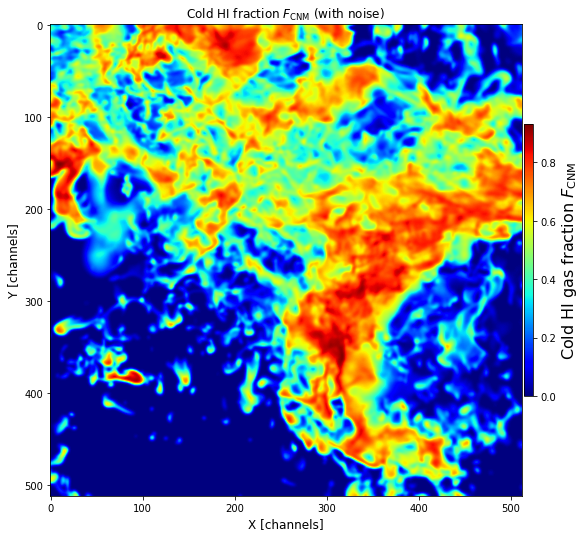

In [55]:
plt.figure(figsize=(10,10))
plt.imshow(fcnm_data, cmap='plasma')

cbar = plt.colorbar(shrink=0.5, pad=0.005, aspect=30)
cbar.set_label('Cold HI gas fraction $F_\mathrm{CNM}$', size=16)

plt.title('Cold HI fraction $F_\mathrm{CNM}$ (with noise)')
plt.ylabel('Y [channels]', fontsize=12)
plt.xlabel('X [channels]', fontsize=12)
plt.show()

#### $F_{CNM}$ map 2 with noise

In [56]:
print('File:', noise_fcnm_file_q1)
fcnm_data, header = fits.getdata(noise_fcnm_file_q1, header=True)
print(fcnm_data.shape)

File: /content/gdrive/My Drive/Colab Notebooks/ML_HI/data/saury/fcnm_map_n01_pw02_vs12_Tcut_500K_512px_quarter_1_noise.fits
(512, 512)


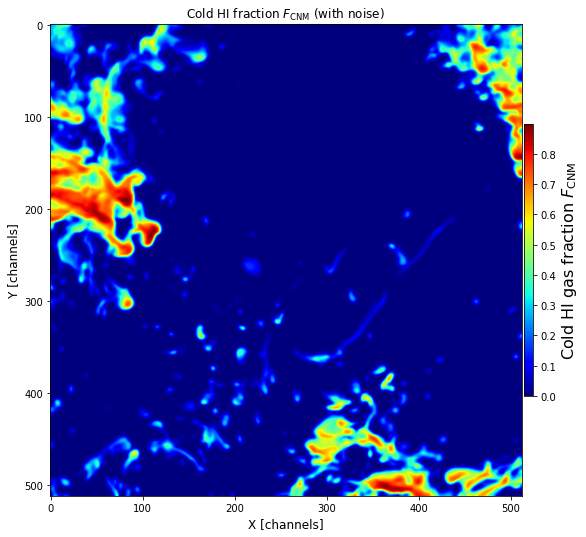

In [57]:
plt.figure(figsize=(10,10))
plt.imshow(fcnm_data, cmap='plasma')

cbar = plt.colorbar(shrink=0.5, pad=0.005, aspect=30)
cbar.set_label('Cold HI gas fraction $F_\mathrm{CNM}$', size=16)

plt.title('Cold HI fraction $F_\mathrm{CNM}$ (with noise)')
plt.ylabel('Y [channels]', fontsize=12)
plt.xlabel('X [channels]', fontsize=12)
plt.show()

#### $F_{CNM}$ map 3 with noise

In [58]:
print('File:', noise_fcnm_file_q2)
fcnm_data, header = fits.getdata(noise_fcnm_file_q2, header=True)
print(fcnm_data.shape)

File: /content/gdrive/My Drive/Colab Notebooks/ML_HI/data/saury/fcnm_map_n01_pw02_vs12_Tcut_500K_512px_quarter_2_noise.fits
(512, 512)


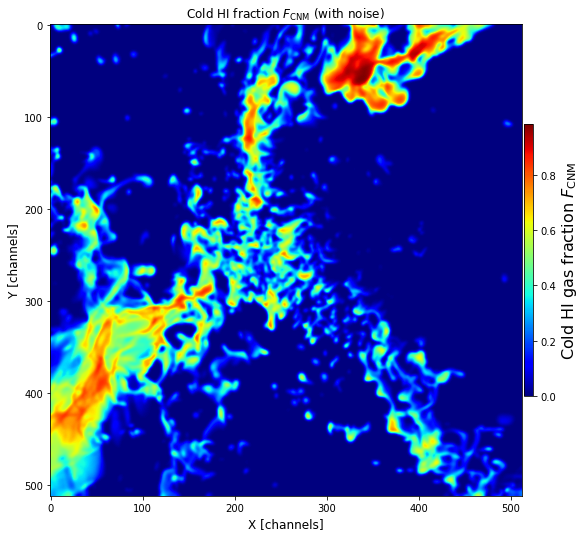

In [59]:
plt.figure(figsize=(10,10))
plt.imshow(fcnm_data, cmap='plasma')

cbar = plt.colorbar(shrink=0.5, pad=0.005, aspect=30)
cbar.set_label('Cold HI gas fraction $F_\mathrm{CNM}$', size=16)

plt.title('Cold HI fraction $F_\mathrm{CNM}$ (with noise)')
plt.ylabel('Y [channels]', fontsize=12)
plt.xlabel('X [channels]', fontsize=12)
plt.show()

#### $F_{CNM}$ map 4 with noise

In [60]:
print('File:', noise_fcnm_file_q3)
fcnm_data, header = fits.getdata(noise_fcnm_file_q3, header=True)
print(fcnm_data.shape)

File: /content/gdrive/My Drive/Colab Notebooks/ML_HI/data/saury/fcnm_map_n01_pw02_vs12_Tcut_500K_512px_quarter_3_noise.fits
(512, 512)


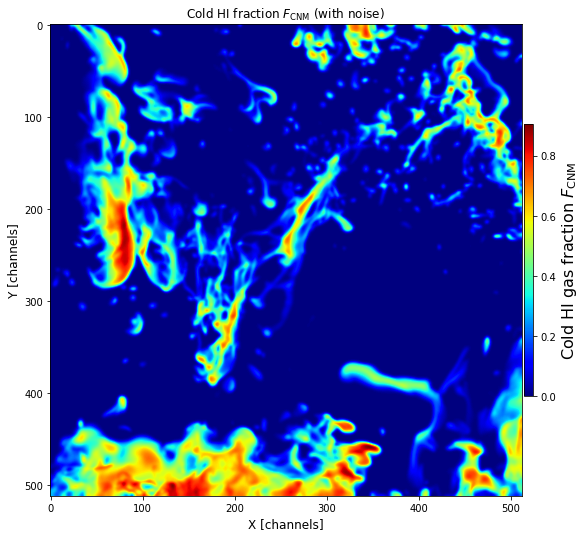

In [61]:
plt.figure(figsize=(10,10))
plt.imshow(fcnm_data, cmap='plasma')

cbar = plt.colorbar(shrink=0.5, pad=0.005, aspect=30)
cbar.set_label('Cold HI gas fraction $F_\mathrm{CNM}$', size=16)

plt.title('Cold HI fraction $F_\mathrm{CNM}$ (with noise)')
plt.ylabel('Y [channels]', fontsize=12)
plt.xlabel('X [channels]', fontsize=12)
plt.show()

# Ground-truth opacity correction factor

Each spectrum at (Xi, Yi) has a corresponding ground-truth $R_{HI}$ at the same sky pixel (Xi, Yi).

### $R_{HI}$ maps without noise (no convolution with telescope beam)

#### $R_{HI}$ map 1

In [77]:
print('RHI file: ', rhi_file_q0)
rhi_data, header = fits.getdata(rhi_file_q0, header=True)

print(rhi_data.shape)

RHI file:  /content/gdrive/My Drive/Colab Notebooks/ML_HI/data/saury/R_map_n01_pw02_vs12_512px_quarter_0.fits
(512, 512)


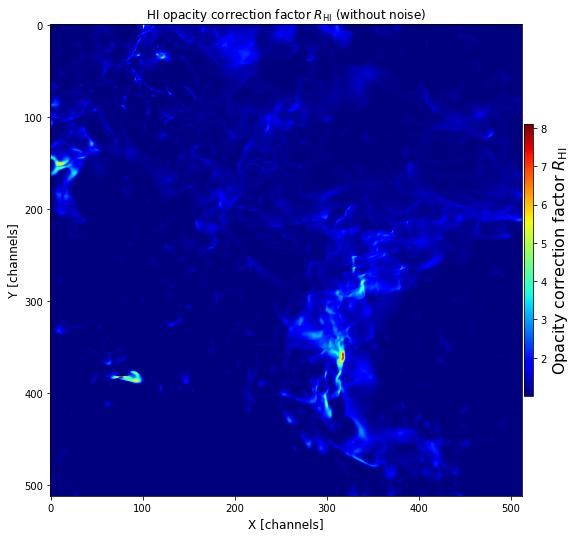

In [78]:
plt.figure(figsize=(10,10))
plt.imshow(rhi_data, cmap='plasma')

cbar = plt.colorbar(shrink=0.5, pad=0.005, aspect=30)
cbar.set_label('Opacity correction factor $R_\mathrm{HI}$', size=16)

plt.title('HI opacity correction factor $R_\mathrm{HI}$ (without noise)')
plt.ylabel('Y [channels]', fontsize=12)
plt.xlabel('X [channels]', fontsize=12)
plt.show()

#### $R_{HI}$ map 2

In [79]:
print('RHI file: ', rhi_file_q1)
rhi_data, header = fits.getdata(rhi_file_q1, header=True)

print(rhi_data.shape)

RHI file:  /content/gdrive/My Drive/Colab Notebooks/ML_HI/data/saury/R_map_n01_pw02_vs12_512px_quarter_1.fits
(512, 512)


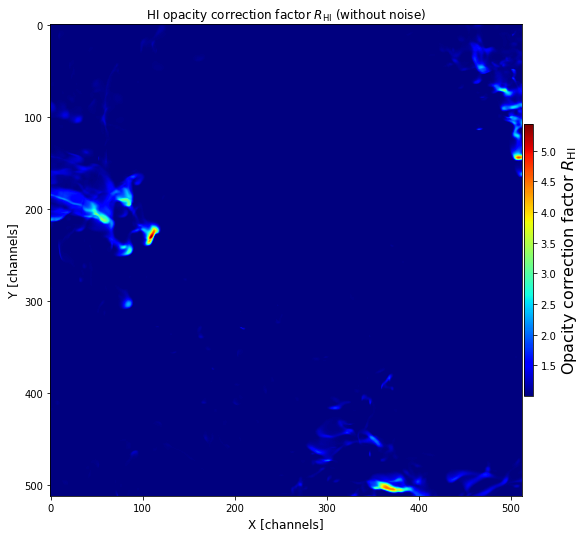

In [80]:
plt.figure(figsize=(10,10))
plt.imshow(rhi_data, cmap='plasma')

cbar = plt.colorbar(shrink=0.5, pad=0.005, aspect=30)
cbar.set_label('Opacity correction factor $R_\mathrm{HI}$', size=16)

plt.title('HI opacity correction factor $R_\mathrm{HI}$ (without noise)')
plt.ylabel('Y [channels]', fontsize=12)
plt.xlabel('X [channels]', fontsize=12)
plt.show()

#### $R_{HI}$ map 3

In [81]:
print('RHI file: ', rhi_file_q2)
rhi_data, header = fits.getdata(rhi_file_q2, header=True)

print(rhi_data.shape)

RHI file:  /content/gdrive/My Drive/Colab Notebooks/ML_HI/data/saury/R_map_n01_pw02_vs12_512px_quarter_2.fits
(512, 512)


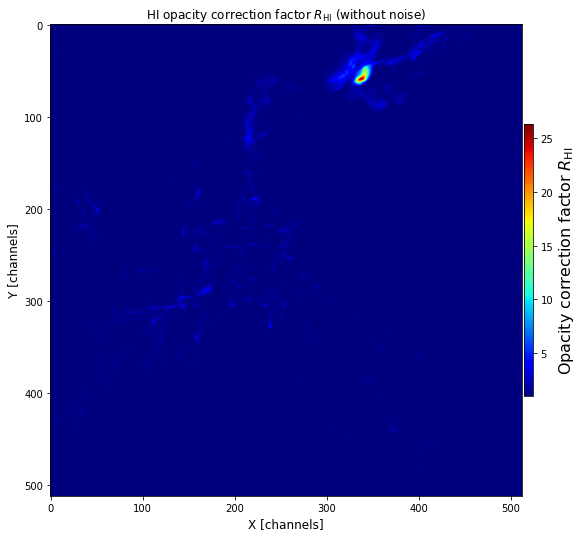

In [82]:
plt.figure(figsize=(10,10))
plt.imshow(rhi_data, cmap='plasma')

cbar = plt.colorbar(shrink=0.5, pad=0.005, aspect=30)
cbar.set_label('Opacity correction factor $R_\mathrm{HI}$', size=16)

plt.title('HI opacity correction factor $R_\mathrm{HI}$ (without noise)')
plt.ylabel('Y [channels]', fontsize=12)
plt.xlabel('X [channels]', fontsize=12)
plt.show()

#### $R_{HI}$ map 4

In [83]:
print('RHI file: ', rhi_file_q3)
rhi_data, header = fits.getdata(rhi_file_q3, header=True)

print(rhi_data.shape)

RHI file:  /content/gdrive/My Drive/Colab Notebooks/ML_HI/data/saury/R_map_n01_pw02_vs12_512px_quarter_3.fits
(512, 512)


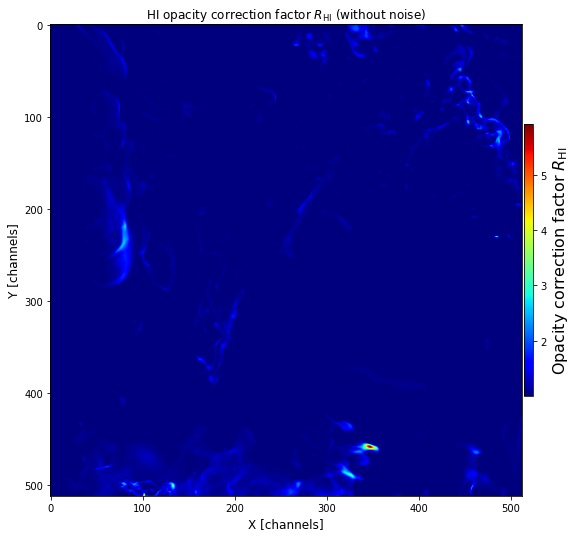

In [84]:
plt.figure(figsize=(10,10))
plt.imshow(rhi_data, cmap='plasma')

cbar = plt.colorbar(shrink=0.5, pad=0.005, aspect=30)
cbar.set_label('Opacity correction factor $R_\mathrm{HI}$', size=16)

plt.title('HI opacity correction factor $R_\mathrm{HI}$ (without noise)')
plt.ylabel('Y [channels]', fontsize=12)
plt.xlabel('X [channels]', fontsize=12)
plt.show()

### $R_{HI}$ map with noise (convolution with telescope beam)

In order to get the sense of uncertainties: Convolve the $R_{HI}$ map with GASKAP beam (30 arcseconds) and assume the HI clouds reside at a distance of 400 pc.

In [85]:
create_map_with_noise = False
if create_map_with_noise:
  # Noise level and beam size
    noise = 1. #K
    beam = 1.45 #pix ASKAP at 400pc with Saury resolution

  #Convolution beam cube
    noise_rhi_data = ndimage.filters.gaussian_filter(rhi_data, [beam,beam])

    hdu0 = fits.PrimaryHDU(noise_rhi_data, header=hdr)
    hdulist = fits.HDUList([hdu0])
    hdulist.writeto('rhi_file.fits', overwrite=True)

#### $R_{HI}$ map 1 with noise

In [86]:
print('RHI file: ', noise_rhi_file_q0)
rhi_data, header = fits.getdata(noise_rhi_file_q0, header=True)

print(rhi_data.shape)

RHI file:  /content/gdrive/My Drive/Colab Notebooks/ML_HI/data/saury/R_map_n01_pw02_vs12_512px_quarter_0_noise.fits
(512, 512)


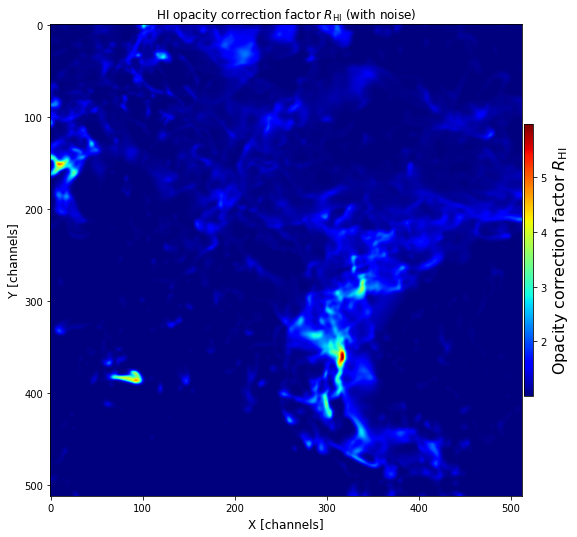

In [88]:
plt.figure(figsize=(10,10))
plt.imshow(rhi_data, cmap='jet')

cbar = plt.colorbar(shrink=0.5, pad=0.005, aspect=30)
cbar.set_label('Opacity correction factor $R_\mathrm{HI}$', size=16)

plt.title('HI opacity correction factor $R_\mathrm{HI}$ (with noise)')
plt.ylabel('Y [channels]', fontsize=12)
plt.xlabel('X [channels]', fontsize=12)
plt.show()

#### $R_{HI}$ map 2 with noise

In [89]:
print('RHI file: ', noise_rhi_file_q1)
rhi_data, header = fits.getdata(noise_rhi_file_q1, header=True)

print(rhi_data.shape)

RHI file:  /content/gdrive/My Drive/Colab Notebooks/ML_HI/data/saury/R_map_n01_pw02_vs12_512px_quarter_1_noise.fits
(512, 512)


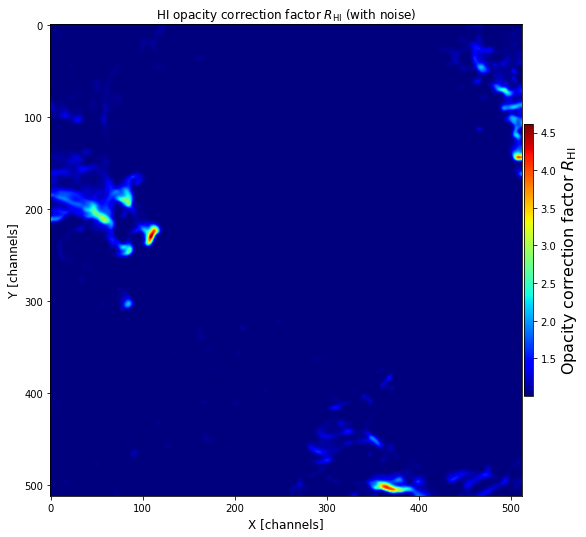

In [90]:
plt.figure(figsize=(10,10))
plt.imshow(rhi_data, cmap='jet')

cbar = plt.colorbar(shrink=0.5, pad=0.005, aspect=30)
cbar.set_label('Opacity correction factor $R_\mathrm{HI}$', size=16)

plt.title('HI opacity correction factor $R_\mathrm{HI}$ (with noise)')
plt.ylabel('Y [channels]', fontsize=12)
plt.xlabel('X [channels]', fontsize=12)
plt.show()

#### $R_{HI}$ map 3 with noise

In [91]:
print('RHI file: ', noise_rhi_file_q2)
rhi_data, header = fits.getdata(noise_rhi_file_q2, header=True)

print(rhi_data.shape)

RHI file:  /content/gdrive/My Drive/Colab Notebooks/ML_HI/data/saury/R_map_n01_pw02_vs12_512px_quarter_2_noise.fits
(512, 512)


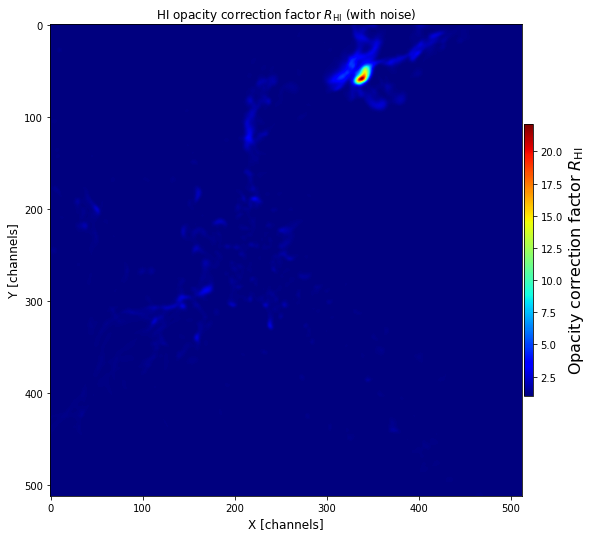

In [92]:
plt.figure(figsize=(10,10))
plt.imshow(rhi_data, cmap='jet')

cbar = plt.colorbar(shrink=0.5, pad=0.005, aspect=30)
cbar.set_label('Opacity correction factor $R_\mathrm{HI}$', size=16)

plt.title('HI opacity correction factor $R_\mathrm{HI}$ (with noise)')
plt.ylabel('Y [channels]', fontsize=12)
plt.xlabel('X [channels]', fontsize=12)
plt.show()

#### $R_{HI}$ map 4 with noise

In [93]:
print('RHI file: ', noise_rhi_file_q3)
rhi_data, header = fits.getdata(noise_rhi_file_q3, header=True)

print(rhi_data.shape)

RHI file:  /content/gdrive/My Drive/Colab Notebooks/ML_HI/data/saury/R_map_n01_pw02_vs12_512px_quarter_3_noise.fits
(512, 512)


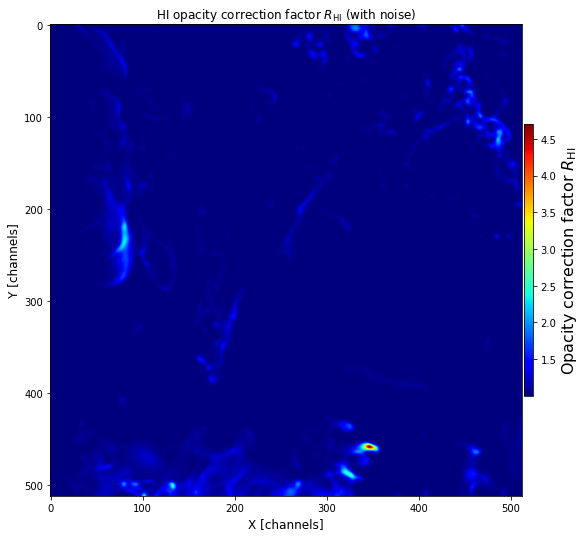

In [94]:
plt.figure(figsize=(10,10))
plt.imshow(rhi_data, cmap='jet')

cbar = plt.colorbar(shrink=0.5, pad=0.005, aspect=30)
cbar.set_label('Opacity correction factor $R_\mathrm{HI}$', size=16)

plt.title('HI opacity correction factor $R_\mathrm{HI}$ (with noise)')
plt.ylabel('Y [channels]', fontsize=12)
plt.xlabel('X [channels]', fontsize=12)
plt.show()

# Plot a few spectra

In [97]:
# Datacube file
print(training_data_file_q0)
data, header = fits.getdata(training_data_file_q0, header=True)

/content/gdrive/My Drive/Colab Notebooks/ML_HI/data/saury/Tb_n01_pw02_vs12_512_thick_quarter_0_noise_1.0_K_beam_1.45_pix_.fits


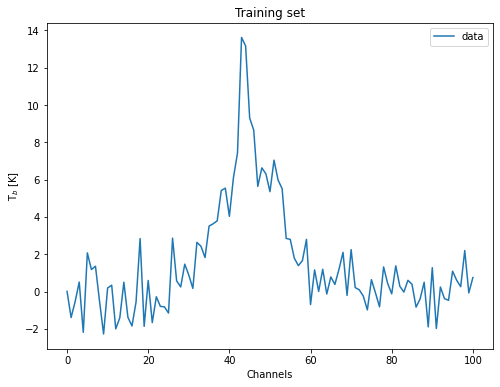

In [98]:
# Spectrum in training set
plt.figure(figsize=(8,6))
plt.plot(data[:, 100, 100], label='data')

plt.title('Training set')
plt.xlabel('Channels')
plt.ylabel('T$_b$ [K]')

plt.legend()

plt.show()

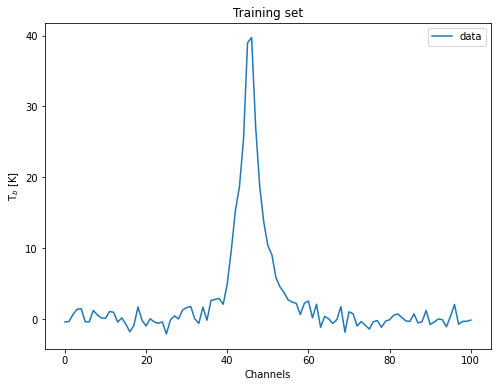

In [99]:
# Spectrum in training set
plt.figure(figsize=(8,6))
plt.plot(data[:, 20, 100], label='data')

plt.title('Training set')
plt.xlabel('Channels')
plt.ylabel('T$_b$ [K]')

plt.legend()

plt.show()

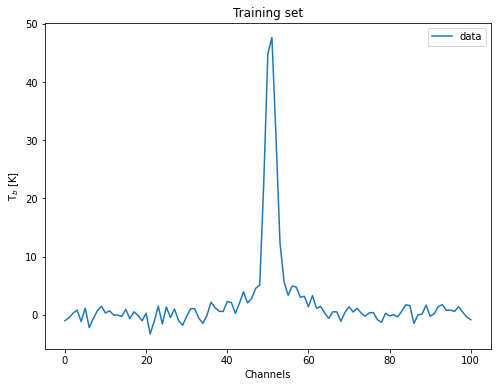

In [100]:
# Spectrum in training set
plt.figure(figsize=(8,6))
plt.plot(data[:, 20, 200], label='data')

plt.title('Training set')
plt.xlabel('Channels')
plt.ylabel('T$_b$ [K]')

plt.legend()

plt.show()

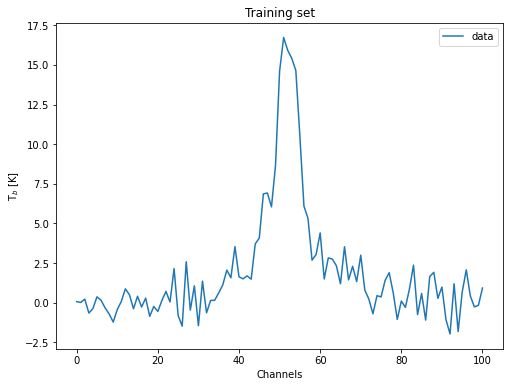

In [101]:
# Spectrum in training set
plt.figure(figsize=(8,6))
plt.plot(data[:, 200, 200], label='data')

plt.title('Training set')
plt.xlabel('Channels')
plt.ylabel('T$_b$ [K]')

plt.legend()

plt.show()

# Images along the wavelength channels

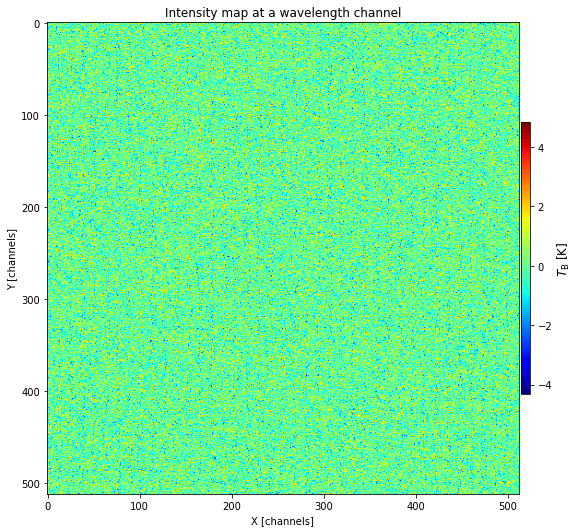

In [104]:
plt.figure(figsize=(10,10))
plt.imshow(data[0, :, :], cmap='jet')

cbar = plt.colorbar(shrink=0.5, pad=0.005, aspect=30)
cbar.set_label('$T_\mathrm{B}$ [K]', size=12)

plt.title('Intensity map at a wavelength channel')
plt.xlabel('X [channels]')
plt.ylabel('Y [channels]')
plt.show()

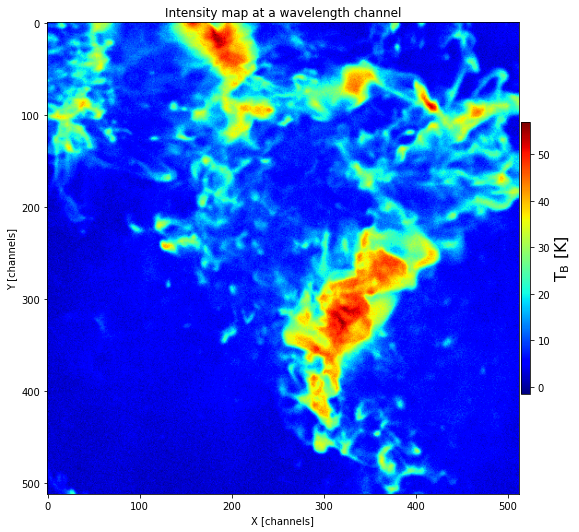

In [105]:
plt.figure(figsize=(10,10))
plt.imshow(data[50, :, :], cmap='jet')

cbar = plt.colorbar(shrink=0.5, pad=0.005, aspect=30)
cbar.set_label('T$_\mathrm{B}$ [K]', size=16)

plt.title('Intensity map at a wavelength channel')
plt.xlabel('X [channels]')
plt.ylabel('Y [channels]')
plt.show()

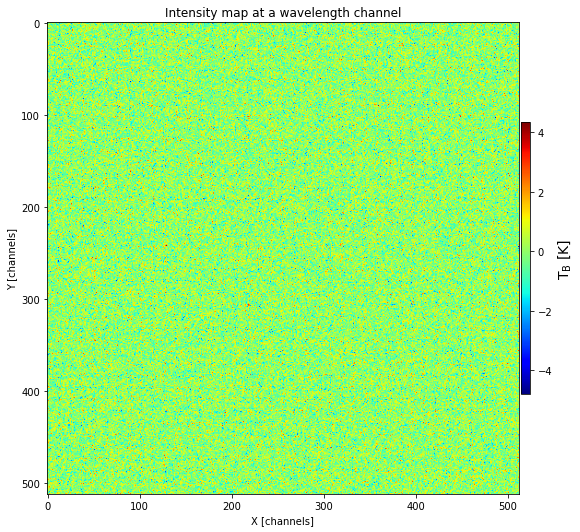

In [106]:
plt.figure(figsize=(10,10))
plt.imshow(data[100, :, :], cmap='jet')

cbar = plt.colorbar(shrink=0.5, pad=0.005, aspect=30)
cbar.set_label('T$_\mathrm{B}$ [K]', size=14)

plt.title('Intensity map at a wavelength channel')
plt.xlabel('X [channels]')
plt.ylabel('Y [channels]')
plt.show()

# Histograms of FCNM and R

In [107]:
FCNM = fcnm_data.ravel()
R    = rhi_data.ravel()

In [108]:
FCNM.shape

(262144,)

In [ ]:
# stats_series = pd.DataFrame(FCNM).describe()
# series_index = stats_series.index.to_list()
# series_values = stats_series.values.flatten()
# print('FCNM:')
# stats_series

In [ ]:
# stats_series = pd.DataFrame(R).describe()
# series_index = stats_series.index.to_list()
# series_values = stats_series.values.flatten()
# print('R:')
# stats_series

## Cold HI gas fraction: $F_{CNM}$ without noise

### $F_{CNM}$ map 1

In [114]:
print('File:', fcnm_file_q0)
fcnm_data, header = fits.getdata(fcnm_file_q0, header=True)
FCNM = fcnm_data.ravel()
print(fcnm_data.shape)

File: /content/gdrive/My Drive/Colab Notebooks/ML_HI/data/saury/fcnm_map_n01_pw02_vs12_Tcut_500K_512px_quarter_0.fits
(512, 512)


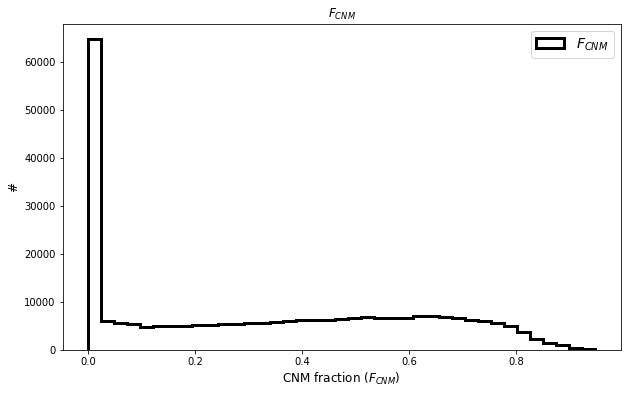

In [115]:
# Plot histograms
plt.figure(figsize=(10, 6))

plt.hist(FCNM, bins=np.linspace(0., FCNM.max(), 40),
         density=False, color='k', histtype='step',
         alpha=1., ls='-', lw=3,
         label='$F_{CNM}$')

plt.title('$F_{CNM}$')
plt.xlabel(r'CNM fraction ($F_{CNM}$)', fontsize=12)
plt.ylabel(r'#', fontsize=12)

plt.legend(loc='upper right', fontsize=14)
plt.show()

### $F_{CNM}$ map 2

In [116]:
print('File:', fcnm_file_q1)
fcnm_data, header = fits.getdata(fcnm_file_q1, header=True)
FCNM = fcnm_data.ravel()
print(fcnm_data.shape)

File: /content/gdrive/My Drive/Colab Notebooks/ML_HI/data/saury/fcnm_map_n01_pw02_vs12_Tcut_500K_512px_quarter_1.fits
(512, 512)


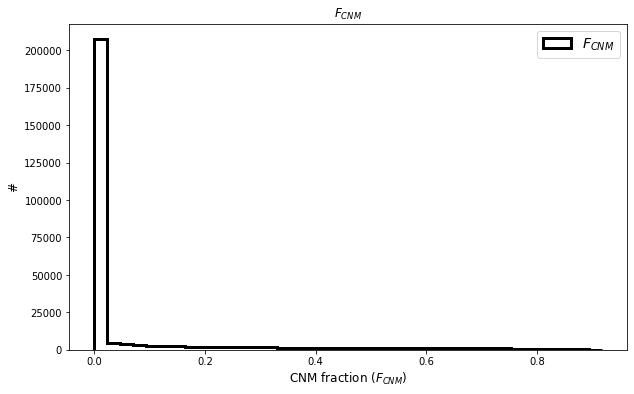

In [117]:
# Plot histograms
plt.figure(figsize=(10, 6))

plt.hist(FCNM, bins=np.linspace(0., FCNM.max(), 40),
         density=False, color='k', histtype='step',
         alpha=1., ls='-', lw=3,
         label='$F_{CNM}$')

plt.title('$F_{CNM}$')
plt.xlabel(r'CNM fraction ($F_{CNM}$)', fontsize=12)
plt.ylabel(r'#', fontsize=12)

plt.legend(loc='upper right', fontsize=14)
plt.show()

### $F_{CNM}$ map 3

In [118]:
print('File:', fcnm_file_q2)
fcnm_data, header = fits.getdata(fcnm_file_q2, header=True)
FCNM = fcnm_data.ravel()
print(fcnm_data.shape)

File: /content/gdrive/My Drive/Colab Notebooks/ML_HI/data/saury/fcnm_map_n01_pw02_vs12_Tcut_500K_512px_quarter_2.fits
(512, 512)


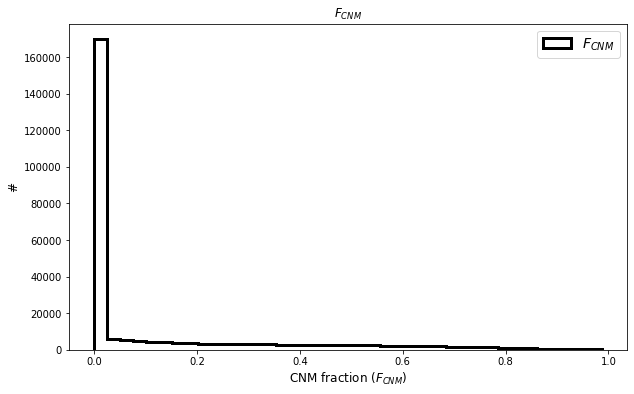

In [119]:
# Plot histograms
plt.figure(figsize=(10, 6))

plt.hist(FCNM, bins=np.linspace(0., FCNM.max(), 40),
         density=False, color='k', histtype='step',
         alpha=1., ls='-', lw=3,
         label='$F_{CNM}$')

plt.title('$F_{CNM}$')
plt.xlabel(r'CNM fraction ($F_{CNM}$)', fontsize=12)
plt.ylabel(r'#', fontsize=12)

plt.legend(loc='upper right', fontsize=14)
plt.show()

### $F_{CNM}$ map 4

In [120]:
print('File:', fcnm_file_q3)
fcnm_data, header = fits.getdata(fcnm_file_q3, header=True)
FCNM = fcnm_data.ravel()
print(fcnm_data.shape)

File: /content/gdrive/My Drive/Colab Notebooks/ML_HI/data/saury/fcnm_map_n01_pw02_vs12_Tcut_500K_512px_quarter_3.fits
(512, 512)


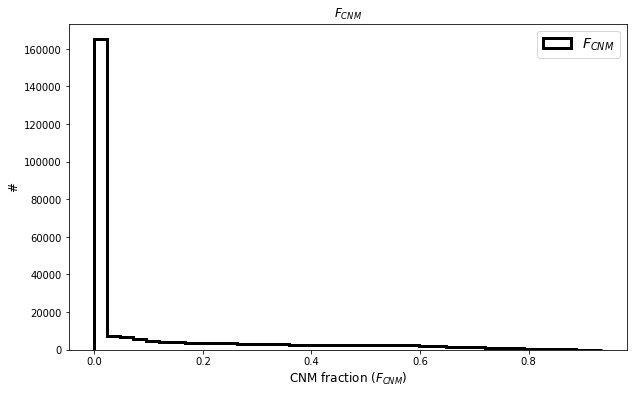

In [121]:
# Plot histograms
plt.figure(figsize=(10, 6))

plt.hist(FCNM, bins=np.linspace(0., FCNM.max(), 40),
         density=False, color='k', histtype='step',
         alpha=1., ls='-', lw=3,
         label='$F_{CNM}$')

plt.title('$F_{CNM}$')
plt.xlabel(r'CNM fraction ($F_{CNM}$)', fontsize=12)
plt.ylabel(r'#', fontsize=12)

plt.legend(loc='upper right', fontsize=14)
plt.show()

## HI Opacity correction  Factor : $R_{HI}$ without noise

### $R_{HI}$ map 1

In [132]:
print('RHI file: ', rhi_file_q0)
rhi_data, header = fits.getdata(rhi_file_q0, header=True)
R = rhi_data.ravel()
print(rhi_data.shape)

RHI file:  /content/gdrive/My Drive/Colab Notebooks/ML_HI/data/saury/R_map_n01_pw02_vs12_512px_quarter_0.fits
(512, 512)


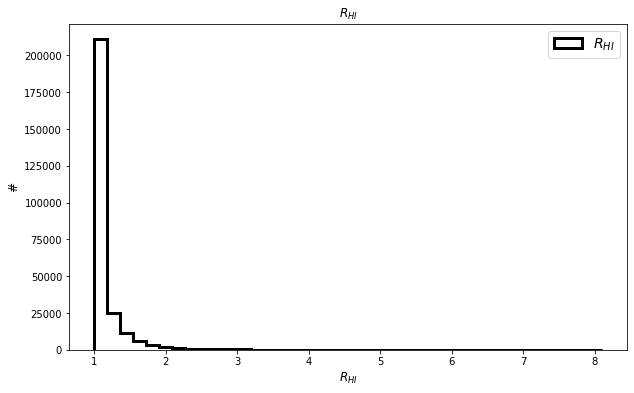

In [133]:
# Plot histograms
plt.figure(figsize=(10, 6))

plt.hist(R, bins=np.linspace(1., R.max(), 40),
         density=False, color='k', histtype='step',
         alpha=1., ls='-', lw=3,
         label='$R_{HI}$')

plt.title('$R_{HI}$')
plt.xlabel('$R_{HI}$', fontsize=12)
plt.ylabel(r'#', fontsize=12)

plt.legend(loc='upper right', fontsize=14)
plt.show()

### $R_{HI}$ map 2

In [134]:
print('RHI file: ', rhi_file_q1)
rhi_data, header = fits.getdata(rhi_file_q1, header=True)
R = rhi_data.ravel()
print(rhi_data.shape)

RHI file:  /content/gdrive/My Drive/Colab Notebooks/ML_HI/data/saury/R_map_n01_pw02_vs12_512px_quarter_1.fits
(512, 512)


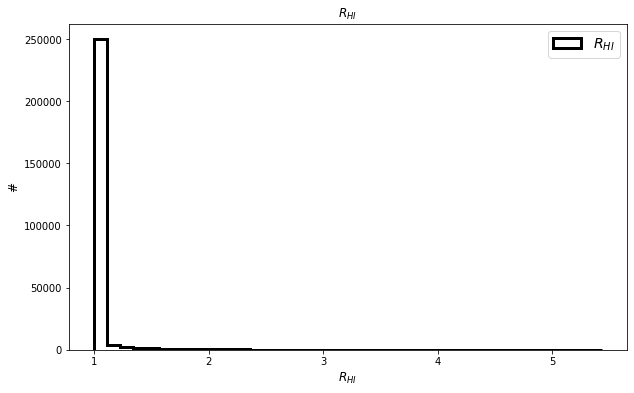

In [135]:
# Plot histograms
plt.figure(figsize=(10, 6))

plt.hist(R, bins=np.linspace(1., R.max(), 40),
         density=False, color='k', histtype='step',
         alpha=1., ls='-', lw=3,
         label='$R_{HI}$')

plt.title('$R_{HI}$')
plt.xlabel('$R_{HI}$', fontsize=12)
plt.ylabel(r'#', fontsize=12)

plt.legend(loc='upper right', fontsize=14)
plt.show()

### $R_{HI}$ map 3

In [136]:
print('RHI file: ', rhi_file_q2)
rhi_data, header = fits.getdata(rhi_file_q2, header=True)
R = rhi_data.ravel()
print(rhi_data.shape)

RHI file:  /content/gdrive/My Drive/Colab Notebooks/ML_HI/data/saury/R_map_n01_pw02_vs12_512px_quarter_2.fits
(512, 512)


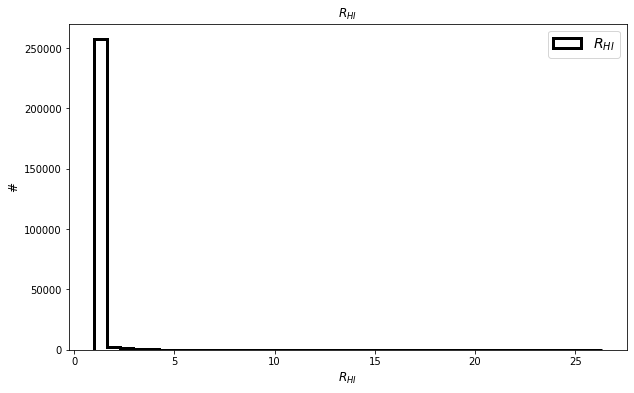

In [137]:
# Plot histograms
plt.figure(figsize=(10, 6))

plt.hist(R, bins=np.linspace(1., R.max(), 40),
         density=False, color='k', histtype='step',
         alpha=1., ls='-', lw=3,
         label='$R_{HI}$')

plt.title('$R_{HI}$')
plt.xlabel('$R_{HI}$', fontsize=12)
plt.ylabel(r'#', fontsize=12)

plt.legend(loc='upper right', fontsize=14)
plt.show()

### $R_{HI}$ map 4

In [138]:
print('RHI file: ', rhi_file_q3)
rhi_data, header = fits.getdata(rhi_file_q3, header=True)
R = rhi_data.ravel()
print(rhi_data.shape)

RHI file:  /content/gdrive/My Drive/Colab Notebooks/ML_HI/data/saury/R_map_n01_pw02_vs12_512px_quarter_3.fits
(512, 512)


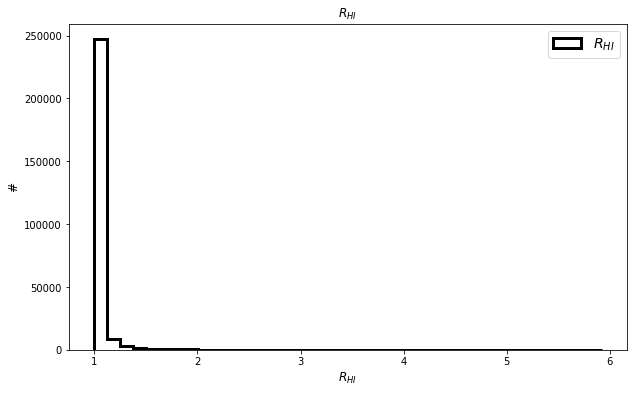

In [139]:
# Plot histograms
plt.figure(figsize=(10, 6))

plt.hist(R, bins=np.linspace(1., R.max(), 40),
         density=False, color='k', histtype='step',
         alpha=1., ls='-', lw=3,
         label='$R_{HI}$')

plt.title('$R_{HI}$')
plt.xlabel('$R_{HI}$', fontsize=12)
plt.ylabel(r'#', fontsize=12)

plt.legend(loc='upper right', fontsize=14)
plt.show()